<a href="https://colab.research.google.com/github/priyeshmandalwork/Hand-Gesture-Project/blob/main/Numeric_Best_Fit_Hand_Gesture_Model_Priyesh_Mandal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Data Loading and Exploration
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving My Numbers Dataset compiled.zip to My Numbers Dataset compiled.zip
User uploaded file "My Numbers Dataset compiled.zip" with length 338536637 bytes


In [4]:
#Folder extraction
import zipfile
import os

for fn in uploaded.keys():
  zip_ref = zipfile.ZipFile(fn, 'r')
  zip_ref.extractall('.')
  zip_ref.close()

print("File extracted successfully.")

File extracted successfully.


In [5]:
import os

# List the contents of the current directory (where the zip was extracted)
print(os.listdir('.'))

['.config', 'My Numbers Dataset compiled', 'My Numbers Dataset compiled.zip', '2.jpg', 'sample_data']


In [6]:
import os

# List the contents of the 'My Numbers Dataset compiled' directory
print(os.listdir('./My Numbers Dataset compiled'))

['8', '9', '3', '7', '4', '0', '5', 'unknown', '1', '6', '2']


In [7]:
#data loading and preprocessing
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

images = []
labels = []
image_size = (64, 64)
dataset_path = './My Numbers Dataset compiled' # Define the dataset path

for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path) and label.isdigit(): # Check if the directory name is a digit
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                image = cv2.resize(image, image_size)
                image = image / 255.0
                images.append(image)
                labels.append(int(label))

images = np.array(images)
labels = np.array(labels)

X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (14000, 64, 64), (14000,)
Validation set shape: (3000, 64, 64), (3000,)
Test set shape: (3000, 64, 64), (3000,)


In [8]:
#Model Building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,914 (2.61 MB)

 Trainable params: 683,914 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model Training
epochs = 15
batch_size = 32

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val))

Epoch 1/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 107s 239ms/step - accuracy: 0.3019 - loss: 1.9457 - val_accuracy: 0.7317 - val_loss: 0.8441
Epoch 2/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 104s 236ms/step - accuracy: 0.7872 - loss: 0.6653 - val_accuracy: 0.8737 - val_loss: 0.3942
Epoch 3/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 106s 242ms/step - accuracy: 0.9095 - loss: 0.2935 - val_accuracy: 0.9147 - val_loss: 0.2807
Epoch 4/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 139s 235ms/step - accuracy: 0.9567 - loss: 0.1450 - val_accuracy: 0.9227 - val_loss: 0.2531
Epoch 5/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 148s 249ms/step - accuracy: 0.9764 - loss: 0.0822 - val_accuracy: 0.9307 - val_loss: 0.2466
Epoch 6/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 108s 246ms/step - accuracy: 0.9827 - loss: 0.0595 - val_accuracy: 0.9363 - val_loss: 0.2377
Epoch 7/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 104s 237ms/step - accuracy: 0.9915 - loss: 0.0326 - val_accuracy: 0.9177 - val_loss: 0.3401
Epoch 8/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 107s 245ms/step - accuracy: 0.9896 -

In [10]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9400 - loss: 0.2778
Test Loss: 0.2959
Test Accuracy: 0.9400


In [12]:
from google.colab import files
from PIL import Image
import numpy as np
import io
from IPython.display import display

def preprocess_image(image_bytes, image_size):
    """
    Preprocesses an image from bytes to a format suitable for the model.

    Args:
        image_bytes: Bytes of the image file.
        image_size: A tuple (width, height) for resizing.

    Returns:
        A NumPy array of the preprocessed image.
    """
    img = Image.open(io.BytesIO(image_bytes)).convert('L') # Convert to grayscale
    img = img.resize(image_size)
    img_array = np.array(img) / 255.0  # Normalize
    # img_array = img_array.flatten() # Flatten image to 1D array - REMOVED
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
    img_array = np.expand_dims(img_array, axis=-1) # Add channel dimension
    return img_array

def predict_uploaded_image(model, image_size):
    """
    Handles image upload, preprocessing, and prediction using the trained model.

    Args:
        model: The trained Keras model.
        image_size: A tuple (width, height) for resizing.
    """
    uploaded = files.upload()

    for fn in uploaded.keys():
        print(f'User uploaded file "{fn}"')
        image_bytes = uploaded[fn]

        preprocessed_img = preprocess_image(image_bytes, image_size)
        prediction = model.predict(preprocessed_img)
        predicted_class = np.argmax(prediction)

        # Print the predicted digit before displaying the image
        print(f"Predicted digit: {predicted_class}")

        # Display the uploaded image
        img = Image.open(io.BytesIO(image_bytes))
        display(img)

Saving five.jpg to five.jpg
User uploaded file "five.jpg"
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted digit: 5


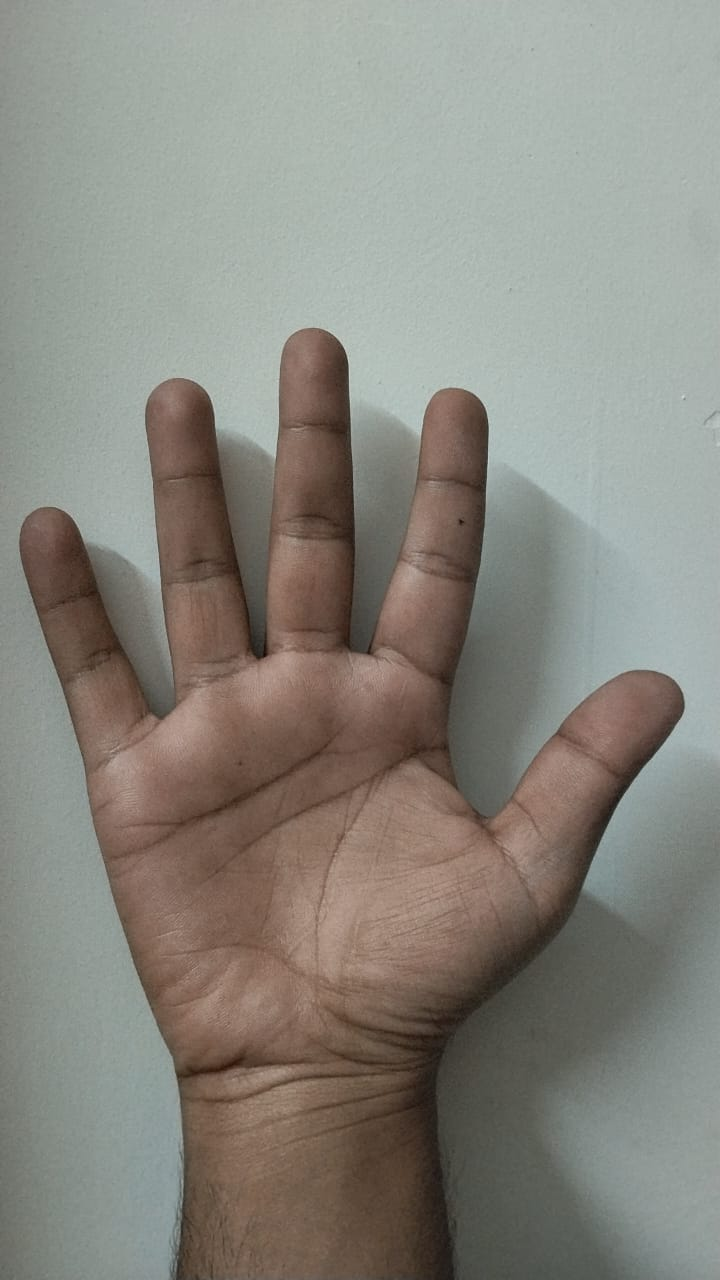

In [14]:
# Call the function to predict on a user-uploaded image
predict_uploaded_image(model, (64, 64)) # Update image_size to (64, 64)